In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import os, os.path, pickle, sys

from scipy import stats

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, Normalize

from matplotlib import cm

from datetime import datetime

In [2]:
data_dir_base = "/Users/hn/Documents/01_research_data/Others/Ehsan/wheat/"
wheat_reOrganized = data_dir_base + "wheat_reOrganized/"

wheat_plot_dir = data_dir_base + "plots/"
dgdd_plot_dir = wheat_plot_dir + "dGDD_precip/"
gdd_plot_dir = wheat_plot_dir + "GDD_precip/"

period_figures_dir = wheat_plot_dir + "period_figures/"
os.makedirs(period_figures_dir, exist_ok=True)

In [3]:
# Define line properties for each subplot
lines_properties = [
    # For Subplot 1
    {"y": [2, 3, 5] * 2,
     "x_start": [8, 9, 33, 21, 22, 73],
     "x_end": [60, 61, 143, 93, 94, 120],
     "labels": ["PR (8-60)", "PRDTR (9-61)", "SRAD (33-143)", None, None, None],
     "colors": list(np.repeat(["orangered", "dodgerblue"], 3)),
     "linewidths": np.repeat([2, 10], 3),
     "points": {"x": [34, 35, 88], "y": [2, 3, 5]},
    },
    # For Subplot 2
    {"y": [1, 5, 6] * 2,
     "x_start": [9, 7, 7, 8, 8, 8],
     "x_end": [61, 21, 105, 90, 79, 90],
     "colors": list(np.repeat(["orangered", "dodgerblue"], 3)),
     "linewidths": np.repeat([2, 10], 3),
     "labels": ["GDD (9-61)", "SRAD (7-21)", "VPD (7-105)", None, None, None],
     "points": {"x": [35, 14, 56], "y": [1, 5, 6]},
    },  # Add points
    # For Subplot 3
    {"y": [2, 3, 5] * 2,
     "x_start": [7, 13, 32, 19, 18, 50],
     "x_end": [67, 145, 140, 98, 100, 115],
     "colors": list(np.repeat(["orangered", "dodgerblue"], 3)),
     "linewidths": np.repeat([2, 10], 3),
     "labels": ["PR (7-67)", "PRDTR (13-145)", "SRAD (32-140)", None, None, None],
     "points": {"x": [37, 79, 86], "y": [2, 3, 5]},
    },  # No points for this subplot
    # For Subplot 4
    {"y": [4, 6] * 2,
     "x_start": [35, 86, 27, 89],
     "x_end": [41, 150, 57, 129],
     "colors": list(np.repeat(["orangered", "dodgerblue"], 2)),
     "linewidths": np.repeat([2, 10], 2),
     "labels": ["RH (35-41)", "VPD (86-150)", None, None],
     "points": {"x": [38, 118], "y": [4, 6]},
    },
    # For Subplot 5
    {"y": [3, 3 - 0.03],  # Ehsan
     "x_start": [47, 48.75],
     "x_end": [51, 49.25],
     "colors": list(np.repeat(["orangered", "dodgerblue"], 1)),
     "linewidths": [2, 10],
     "labels": ["PRDTR (47-51)", None],
     "points": {"x": [49], "y": [3]}
    }
]

In [4]:
tick_legend_FontSize = 2
params = {"font.family": "Arial",
          "legend.fontsize": tick_legend_FontSize * 1,
          "axes.labelsize": tick_legend_FontSize * 1.2,
          "axes.titlesize": tick_legend_FontSize * 2,
          "xtick.labelsize": tick_legend_FontSize * 8,
          "ytick.labelsize": tick_legend_FontSize * 8,
          "axes.titlepad": 10,
          "xtick.bottom": True,
          "xtick.labelbottom": True,
          "ytick.left": False,
          "ytick.labelleft": False,
          "axes.linewidth": 0.05}
plt.rcParams.update(params)

# Manually define subplot titles
subplot_titles = ["Grain Yield", "Heading Date", "Plant Height", "Protein Content", "Test Weight"]

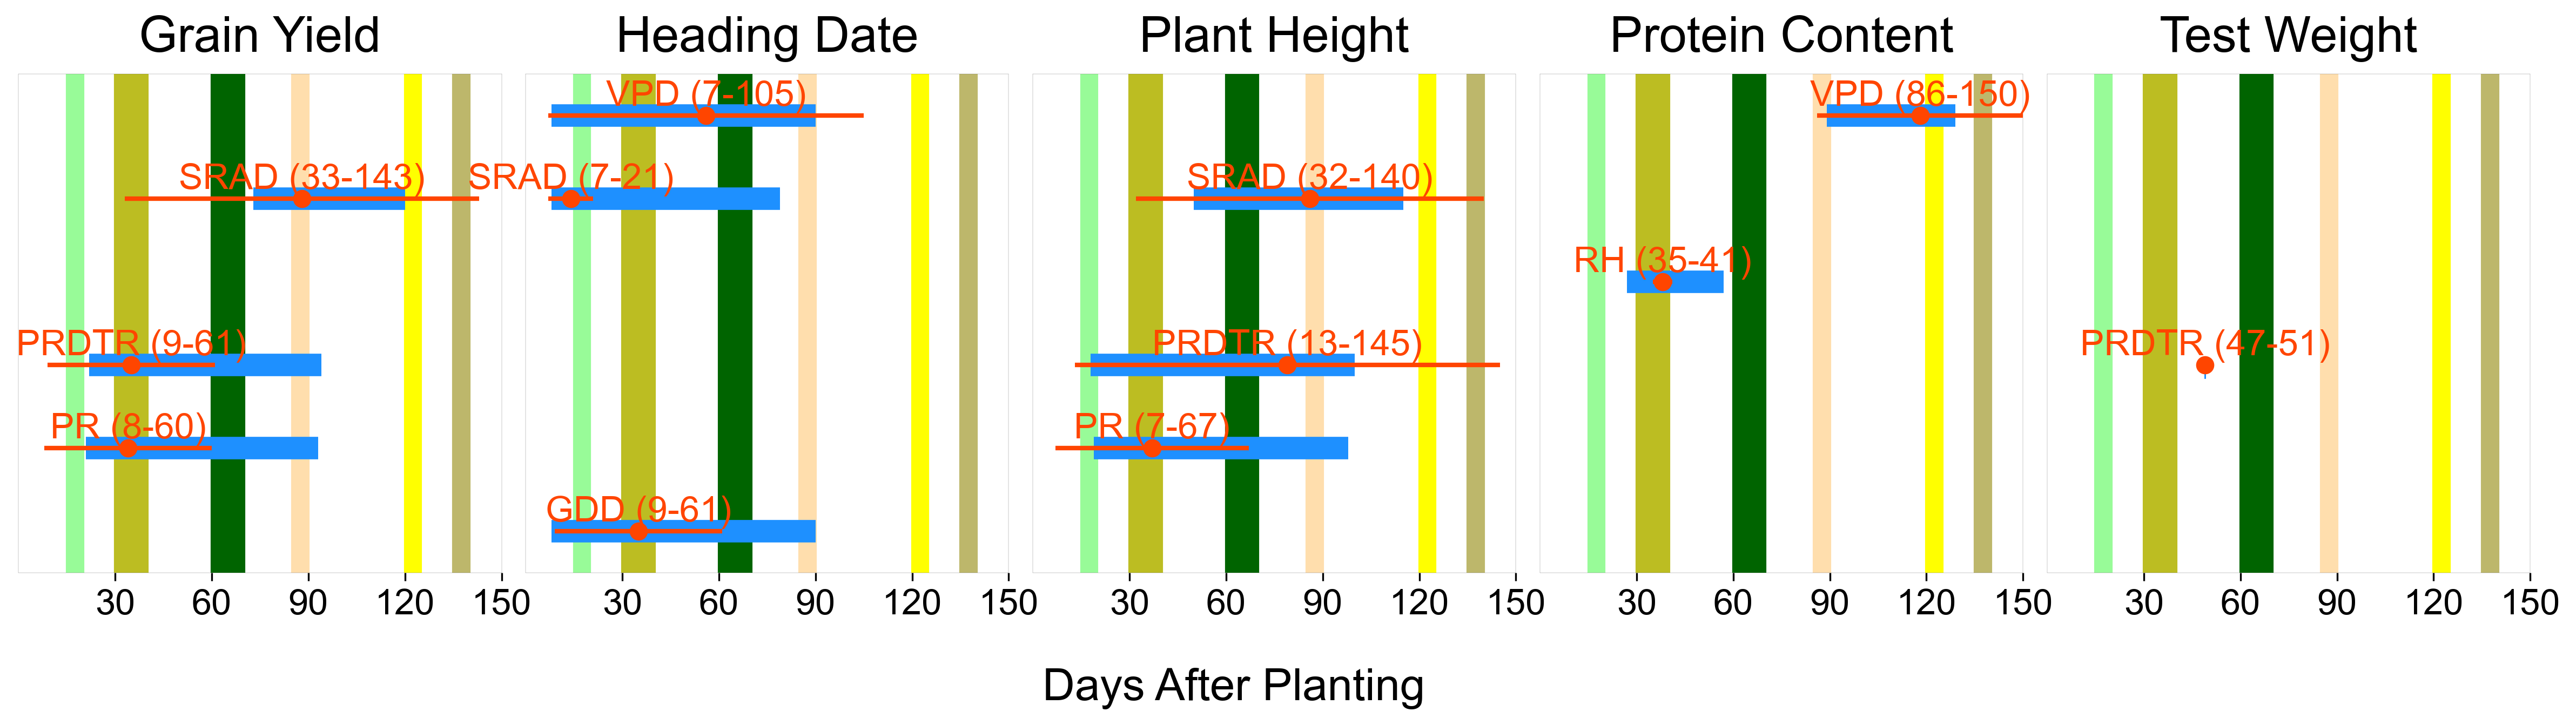

In [6]:
# Create a figure and axes with 1 row and 5 columns
fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharex=True, sharey=True,
                         gridspec_kw={"hspace": 0.15, "wspace": 0.05}, dpi=300)

# Add horizontal lines, labels, and points to each subplot
for i, ax in enumerate(axes):
    props = lines_properties[i]
    for y, x_start, x_end, color, lw_, label in zip(props["y"], props["x_start"],
                                                    props["x_end"], props["colors"],
                                                    props["linewidths"], props["labels"]):
        if color == "dodgerblue":
            ax.hlines(y=y, xmin=x_start, xmax=x_end, color=color, lw=lw_, alpha=1)
        elif color == "orangered":
            ax.hlines(y=y,xmin=x_start,xmax=x_end,color=color, lw=lw_, zorder=3)

        if label:  # Add the label if specified
            midpoint_x = (x_start + x_end) / 2
            ax.text(midpoint_x, y + 0.03, label, color=color, ha="center", va="bottom", fontsize=16)
    # Add points if defined
    points = props.get("points", {})
    if points:  # Add points with custom size and color
        ax.scatter(points["x"], points["y"], color="orangered", s=50, label="Point", zorder=3)

    ax.set_xticks([30, 60, 90, 120, 150])
    ax.set_title(subplot_titles[i], fontsize=22)  # Set manual title
    ax.tick_params(axis="x", which="major")
    ax.axvspan(15,20, ymax=1, color="palegreen") # Germination
    ax.axvspan(30, 40, ymax=1, color=mcolors.TABLEAU_COLORS["tab:olive"]) # Tillering
    ax.axvspan(60, 70, ymax=1, color="darkgreen")# Heading
    ax.axvspan(85, 90, ymax=1, color="navajowhite") # Flowering
    ax.axvspan(120, 125, ymax=1, color="yellow")
    ax.axvspan(135, 140, ymax=1, color="darkkhaki")

plt.xlim(0, 150)
plt.ylim(0.5, 6.5)
fig.supxlabel("days after planting".title(), fontsize=20, y=-0.1)
fig_name = period_figures_dir + "traits_windows_range"
# plt.savefig(fig_name + ".pdf", bbox_inches="tight", dpi=300)
# plt.savefig(fig_name + ".jpg", bbox_inches="tight", dpi=300)
plt.show()

# Second Plot

In [7]:

# Create a figure and axes with 1 row and 6 columns
# Define line properties for each subplot
lines_properties = [
    # For Subplot 1
    {"y": [1, 5, 1 - 0.03, 5 - 0.03],
     "x_start": [8, 7, 21, 19],
     "x_end": [60, 67, 93, 98],
     "colors": list(np.repeat(["orangered", "dodgerblue"], 2)),
     "linewidths": np.repeat([2, 10], 2),
     "labels": ["Grain Yield (8-60)", "Plant Height (7-67)", None, None],
     "points": {"x": [34, 37], "y": [1, 5]},
    },
    # For Subplot 2
    {"y": [1, 5, 9, 1 - 0.03, 
           5 - 0.03, 9 - 0.03],
     "x_start": [9, 13, 47, 22, 18, 48.75],
     "x_end": [61, 145, 51, 94, 100, 49.25],
     "colors": list(np.repeat(["orangered", "dodgerblue"], 3)),
     "linewidths": np.repeat([2, 10], 3),
     "labels": ["Grain Yield (9-61)", "Plant Height (13-145)", "Test Weight (47-51)", None, None, None],
     "points": { "x": [35, 79, 49], "y": [1, 5, 9]},
    },
    # For Subplot 3
    {"y": [3, 3 - 0.03],
     "x_start": [9, 8], "x_end": [61, 90],
     "colors": list(np.repeat(["orangered", "dodgerblue"], 1)),
     "linewidths": np.repeat([2, 10], 1),
     "labels": ["Heading date (9-61)", None],
     "points": {"x": [35], "y": [3]},
    },  # No points for this subplot
    # For Subplot 4
    {"y": [1, 3, 5, 1 - 0.03,
           3 - 0.03, 5 - 0.03],
     "x_start": [33, 7, 32, 73, 8, 50],
     "x_end": [143, 21, 140, 120, 79, 115],
     "colors": list(np.repeat(["orangered", "dodgerblue"], 3)),
     "linewidths": np.repeat([2, 10], 3),
     "labels": ["Grain Yield (9-61)", "Heading Date (7-21)", "Plant Height (32-140)", None, None, None],
     "points": {"x": [86, 14, 86],
                "y": [1, 3, 5]},
    },  # Add a point
    # For Subplot 5
    {"y": [3, 7, 3 - 0.03, 7 - 0.03],
     "x_start": [7, 86, 8, 89],
     "x_end": [105, 150, 90, 129],
     "colors": list(np.repeat(["orangered", "dodgerblue"], 2)),
     "linewidths": np.repeat([2, 10], 2),
     "labels": ["Heading Date (7-105)", "Protein Content (86-150)", None, None],
     "points": {"x": [56, 118], "y": [3, 7]},
    },  # Add points
    # For Subplot 6
    {"y": [7, 7 - 0.03],
     "x_start": [35, 27],
     "x_end": [41, 57],
     "colors": list(np.repeat(["orangered", "dodgerblue"], 2)),
     "linewidths": np.repeat([2, 10], 1),
     "labels": ["Protein Content (35-41)", None],
     "points": {"x": [38], "y": [7]},
    }
]

In [8]:
tick_legend_FontSize = 2
params = {"font.family": "Arial",
          "legend.fontsize": tick_legend_FontSize * 1,
          "axes.labelsize": tick_legend_FontSize * 1.2,
          "axes.titlesize": tick_legend_FontSize * 2,
          "xtick.labelsize": tick_legend_FontSize * 3,
          "ytick.labelsize": tick_legend_FontSize * 3,
          "axes.titlepad": 10,
          "xtick.bottom": True,
          "ytick.left": False,
          "xtick.labelbottom": True,
          "ytick.labelleft": False,
          "axes.linewidth": 0.05}

plt.rcParams.update(params)

In [9]:
subplot_titles = ["Precipitation", "PRDTR", "GDD", "Solar Radiation", "VPD", "Relative Humidity"]

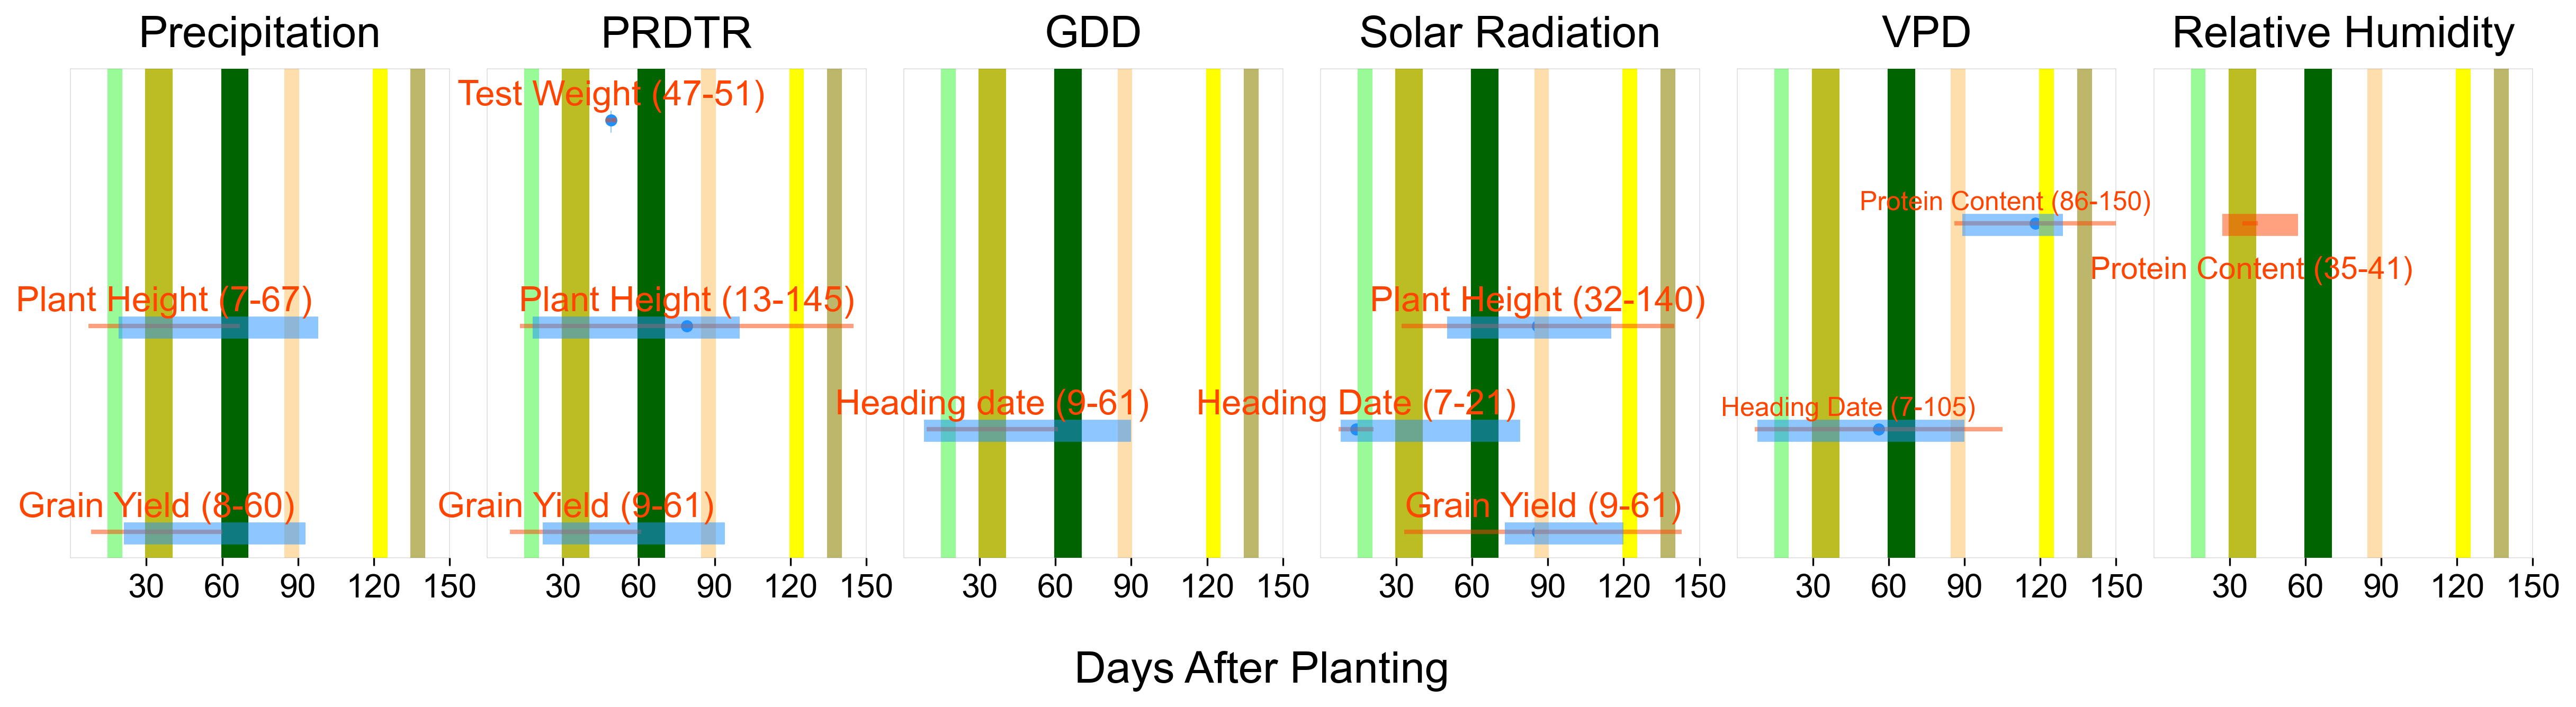

In [11]:
fig, axes = plt.subplots(1, 6, figsize=(20, 4), sharex=True, sharey=True,
                         gridspec_kw={"hspace": 0.15, "wspace": 0.1}, dpi=300)

# Add horizontal lines, labels, and points to each subplot
for i, ax in enumerate(axes):
    props = lines_properties[i]
    for y, x_start, x_end, clr_, lw_, label in zip(props["y"], props["x_start"],
                                                     props["x_end"], props["colors"],
                                                     props["linewidths"], props["labels"]):
        # Add the label if specified
        if label:
            if subplot_titles[i] == "Relative Humidity":
                midpt_x = (x_start + x_end) / 2
                ax.text(midpt_x + (20 * 0.03), y - (0.03 * 40), label, c=clr_,
                        ha="center", va="bottom", fontsize=14)
            elif subplot_titles[i] == "VPD":
                midpt_x = (x_start + x_end) / 2
                ax.text(midpt_x - (400 * 0.03), y + (5 * 0.03), label,c=clr_, ha="center", va="bottom", fontsize=12)
            else:
                midpt_x = (x_start + x_end) / 2
                ax.text(midpt_x, y + (5 * 0.03), label, c=clr_, ha="center", va="bottom", fontsize=16)

        # Draw the horizontal line with specified color and thickness
        if color == "dodgerblue":
            ax.hlines(y=y, xmin=x_start, xmax=x_end, color=clr_, lw=lw_, alpha=0.5)
        elif color == "orangered":
            ax.hlines(y=y, xmin=x_start, xmax=x_end, color=clr_, lw=lw_, zorder=3, alpha=0.6)

    # Add points if defined
    points = props.get("points", {})
    if points:
        ax.scatter(points["x"], points["y"], color=clr_, s=20)
    # Set specific x-axis ticks
    ax.set_xticks([30, 60, 90, 120, 150])
    ax.set_title(subplot_titles[i], fontsize=20)  # Set manual title
    ax.tick_params(axis="x", which="major", labelsize=15)
    
    ax.axvspan(15,20, ymax=1, color="palegreen") # Germination
    ax.axvspan(30, 40, ymax=1, color=mcolors.TABLEAU_COLORS["tab:olive"]) # Tillering
    ax.axvspan(60, 70, ymax=1, color="darkgreen")# Heading
    ax.axvspan(85, 90, ymax=1, color="navajowhite") # Flowering
    ax.axvspan(120, 125, ymax=1, color="yellow")
    ax.axvspan(135, 140, ymax=1, color="darkkhaki")

plt.xlim(0, 150); plt.ylim(0.5, 10)
fig.supxlabel("days after planting".title(), fontsize=20, y=-0.1)
fig_name = period_figures_dir + "climate_windows_range"
plt.show();